6章 テキストとシーケンスのためのディープラーニング
=========================================

## 2.リカレントニューラルネットワークを理解する

> 単純なRNNのNumPy実装

In [5]:
import numpy as np

timesteps = 100          # 入力シーケンスの時間刻みの数
input_features = 32    # 入力特徴空間の次元の数
output_features = 64 # 出力特徴空間の次元の数

# 入力データ：ランダムにノイズを挿入
inputs = np.random.random((timesteps, input_features))

# 初期状態：全て0のベクトル
state_t = np.zeros((output_features, ))

# ランダムな重み行列を作成
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []

# input_tは形状が(input_features, )のベクトル
for input_t in inputs:
    # 入力と現在の状態(1つ前の出力)を結合して現在の出力を取得
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    # この出力をリストに格納
    successive_outputs.append(output_t)
    # 次の時間刻みのためにRNNの状態を更新
    state_t = output_t
    
# 最終的な出力は形状が(timesteps, output_features)の2次元テンソル
final_output_sequence = np.stack(successive_outputs, axis=0)

In [3]:
print(final_output_sequence.shape)

(100, 64)


> `SimpleRNN`を使って、最後の時間刻みの出力だけを返す例

In [6]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Using TensorFlow backend.
/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


> 完全な状態を表すシーケンスが返される

In [7]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


> 完全な出力シーケンスを取得するために、中間の層の出力を全て取得する

In [8]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # 最後の層は最後の出力を返すだけ
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


> IMDbデータの前処理

In [9]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # 特徴量として考慮する単語の数
maxlen = 500  # この数の単語を残してテキストをカット
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


> Embedding層とSimpleRNN層を使ってモデルを訓練

In [10]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

W0917 19:04:36.321449 4573345216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0917 19:04:36.334964 4573345216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0917 19:04:36.339036 4573345216 deprecation.py:323] From /usr/local/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0917 19:04:36.614425 4573345216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 12s 608us/step - loss: 0.6450 - acc: 0.6082 - val_loss: 0.5425 - val_acc: 0.7306
Epoch 2/10
20000/20000 [==============================] - 12s 577us/step - loss: 0.4081 - acc: 0.8258 - val_loss: 0.5215 - val_acc: 0.7678
Epoch 3/10
20000/20000 [==============================] - 12s 579us/step - loss: 0.2995 - acc: 0.8795 - val_loss: 0.3577 - val_acc: 0.8472
Epoch 4/10
20000/20000 [==============================] - 12s 582us/step - loss: 0.2145 - acc: 0.9194 - val_loss: 0.3444 - val_acc: 0.8622
Epoch 5/10
20000/20000 [==============================] - 12s 584us/step - loss: 0.1465 - acc: 0.9457 - val_loss: 0.3732 - val_acc: 0.8682
Epoch 6/10
20000/20000 [==============================] - 12s 581us/step - loss: 0.0929 - acc: 0.9686 - val_loss: 0.4439 - val_acc: 0.8594
Epoch 7/10
20000/20000 [==============================] - 12s 583us/step - loss: 0.0651 - acc: 0.9791 - val_loss: 0.5

> 結果をプロット

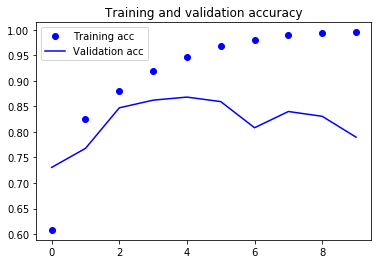

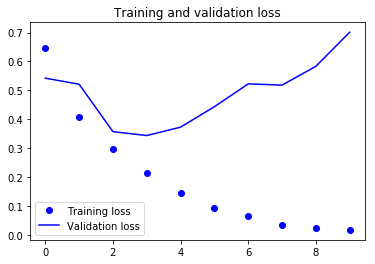

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

> KerasでのLSTM層の使用

In [13]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.5094 - acc: 0.7609 - val_loss: 0.3359 - val_acc: 0.8704
Epoch 2/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.2901 - acc: 0.8852 - val_loss: 0.2814 - val_acc: 0.8800
Epoch 3/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.2328 - acc: 0.9114 - val_loss: 0.3851 - val_acc: 0.8694
Epoch 4/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1968 - acc: 0.9265 - val_loss: 0.6120 - val_acc: 0.8252
Epoch 5/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1760 - acc: 0.9365 - val_loss: 0.2962 - val_acc: 0.8772
Epoch 6/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.1539 - acc: 0.9442 - val_loss: 0.4952 - val_acc: 0.8340
Epoch 7/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.1436 - acc: 0.9483 - val_loss: 0.3027 - val_acc:

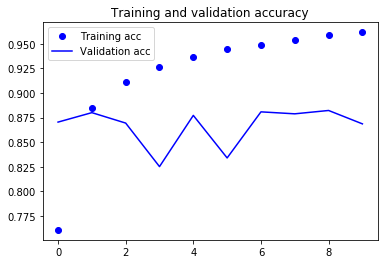

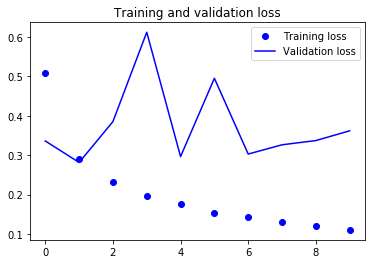

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()